In [79]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
%matplotlib inline

csv_path = "mtfuji_data.csv"  # ファイル名（パス）を指定する
np.set_printoptions(suppress=True)  # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


## 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。

横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

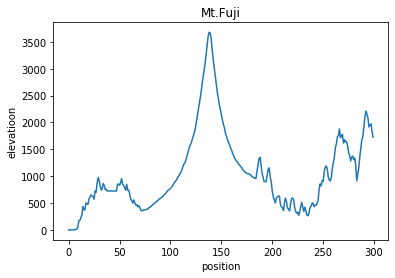

In [80]:
position = fuji[:, 0]
elevation = fuji[:, 3]

plt.xlabel("position")
plt.ylabel("elevatioon")
plt.title("Mt.Fuji")
plt.plot(position, elevation)
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。

しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

<img src="https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png">

In [81]:
def compute_gradient_Fuji(position):
    dx = fuji[position, 0] - fuji[position-1, 0]
    dy = fuji[position, 3] - fuji[position-1, 3]

    gradident = dy / dx
    return gradident

## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。

$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。

機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

《ハイパーパラメータとは》

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [82]:
def get_next_position(position, alpha=0.2):
    """
    現在地点より、その地点の勾配を求め、移動先の地点を計算し返します。
    
    Parameters
    ---------------------
    position: int
        現在地点
    alpha: folat
        歩幅
    

    Returns
    ---------------------
    next_position: int
        移動先の地点
    
    """
    grad = compute_gradient_Fuji(position)
    next_position = position - (alpha * grad)
    next_position = int(Decimal(next_position).quantize(Decimal("0"), rounding=ROUND_HALF_UP))
    if 0 <= next_position <= 299:
        return next_position
    else:
        return position
        
print(get_next_position(120))

113


## 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。

移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

《実装上の注意》

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。
移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [83]:
def gradient_decending(position, alpha=0.2):
    """
    現在地点より、山を下り、道程をリストとして返します
    
    Parameters
    ---------------------
    position: int
        現在地点
        
    alpha: float
        学習率

    Returns
    ---------------------
    steps: list
        山を下り終わるまでの道程
    
    """
    steps = [position] #最初の地点をリストに格納する
    cnt = 0 #ループの回数を保持
    LIMIT = 100 #ループの上限を定める
    
    while True:
        next_position = get_next_position(position, alpha)
        steps.append(next_position)
        cnt += 1
        if (position == next_position) or cnt > LIMIT: 
            break
        else:
            position = next_position

    return steps

In [84]:
# 最初の地点を136番の地点として山を下る
first_position = 136

for idx, position in enumerate(gradient_decending(first_position)):
    print("{} 歩目の地点は{}番の地点です".format(idx, position))

0 歩目の地点は136番の地点です
1 歩目の地点は102番の地点です
2 歩目の地点は98番の地点です
3 歩目の地点は95番の地点です
4 歩目の地点は93番の地点です
5 歩目の地点は89番の地点です
6 歩目の地点は85番の地点です
7 歩目の地点は82番の地点です
8 歩目の地点は79番の地点です
9 歩目の地点は73番の地点です
10 歩目の地点は70番の地点です
11 歩目の地点は78番の地点です
12 歩目の地点は77番の地点です
13 歩目の地点は75番の地点です
14 歩目の地点は75番の地点です


## 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》

断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする


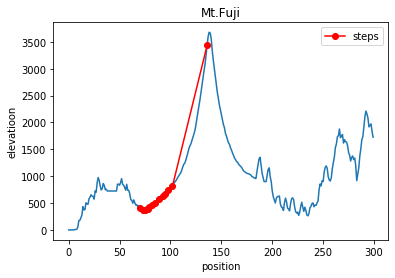

In [85]:
#富士山の断面図
position = fuji[:, 0]
elevation = fuji[:, 3]

#下山過程
first_position = 136
X = gradient_decending(first_position)
Y = [fuji[p, 3] for p in X]

#グラフを描画
plt.xlabel("position")
plt.ylabel("elevatioon")
plt.title("Mt.Fuji")
plt.plot(position, elevation)
plt.plot(X, Y, marker="o", color="red", label="steps")
plt.legend()
plt.show()

## 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。

そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。

機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。

例えば136と142では富士山の異なるの斜面を下ることになります。

In [86]:
# すべての地点で計算
for i in fuji[:, 0]:
    i = int(i)
    steps = gradient_decending(i)
    print(steps)

[0, 0]
[1, 1]
[2, 2]
[3, 3]
[4, 4]
[5, 5]
[6, 5, 5]
[7, 7]
[8, 7, 7]
[9, 1, 1]
[10, 10]
[11, 10, 10]
[12, 2, 2]
[13, 4, 4]
[14, 14]
[15, 27, 31, 51, 41, 41]
[16, 14, 14]
[17, 17]
[18, 22, 13, 4, 4]
[19, 21, 15, 27, 31, 51, 41, 41]
[20, 20]
[21, 15, 27, 31, 51, 41, 41]
[22, 13, 4, 4]
[23, 28, 28]
[24, 24]
[25, 36, 52, 37, 35, 43, 43]
[26, 26]
[27, 31, 51, 41, 41]
[28, 28]
[29, 10, 10]
[30, 41, 41]
[31, 51, 41, 41]
[32, 47, 47]
[33, 27, 31, 51, 41, 41]
[34, 15, 27, 31, 51, 41, 41]
[35, 43, 43]
[36, 52, 37, 35, 43, 43]
[37, 35, 43, 43]
[38, 44, 44]
[39, 39]
[40, 40]
[41, 41]
[42, 42]
[43, 43]
[44, 44]
[45, 45]
[46, 46]
[47, 47]
[48, 22, 13, 4, 4]
[49, 49]
[50, 54, 58, 80, 80]
[51, 41, 41]
[52, 37, 35, 43, 43]
[53, 74, 74]
[54, 58, 80, 80]
[55, 63, 74, 74]
[56, 66, 74, 74]
[57, 35, 43, 43]
[58, 80, 80]
[59, 59]
[60, 73, 70, 78, 77, 75, 75]
[61, 83, 80, 80]
[62, 64, 52, 37, 35, 43, 43]
[63, 74, 74]
[64, 52, 37, 35, 43, 43]
[65, 76, 75, 75]
[66, 74, 74]
[67, 66, 74, 74]
[68, 76, 75, 75]
[69,

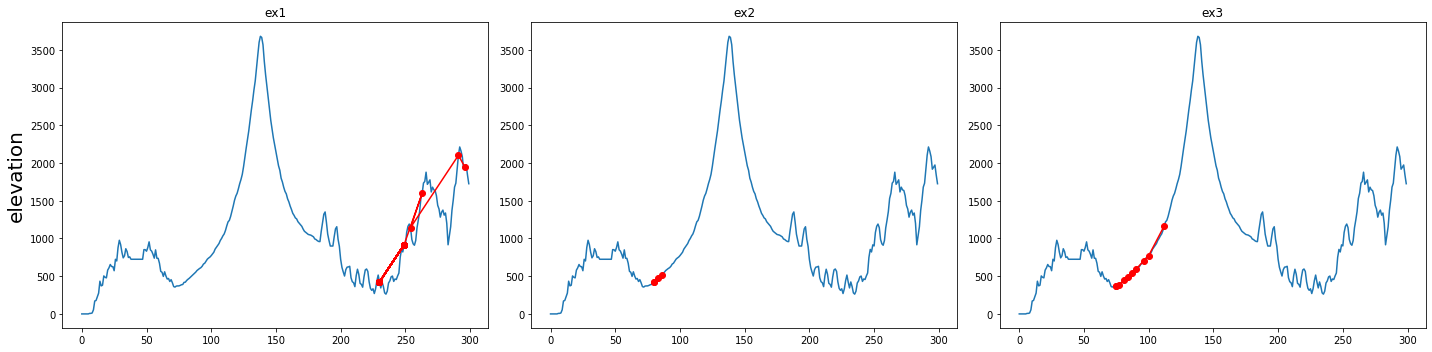

In [87]:
# いくつかのランダムな初期値について可視化

#富士山の断面図
position = fuji[:, 0]
elevation = fuji[:, 3]

#下山過程
##ex1
X1 = gradient_decending(np.random.randint(0, 300))
Y1 = [fuji[p, 3] for p in X1]
##ex2
X2 = gradient_decending(np.random.randint(0, 300))
Y2 = [fuji[p, 3] for p in X2]
##ex3
X3 = gradient_decending(np.random.randint(0, 300))
Y3 = [fuji[p, 3] for p in X3]

#グラフを描画
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.plot(position, elevation)
ax1.plot(X1, Y1, marker="o", color="r")
ax1.set_title("ex1")
ax1.set_ylabel("elevation", size=20)

ax2.plot(position, elevation)
ax2.plot(X2, Y2, marker="o", color="r")
ax2.set_title("ex2")

ax3.plot(position, elevation)
ax3.plot(X3, Y3, marker="o", color="r")
ax3.set_title("ex3")

plt.tight_layout()
plt.show()

## 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ $α$を変化させるとどのような下山過程となるか、

問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

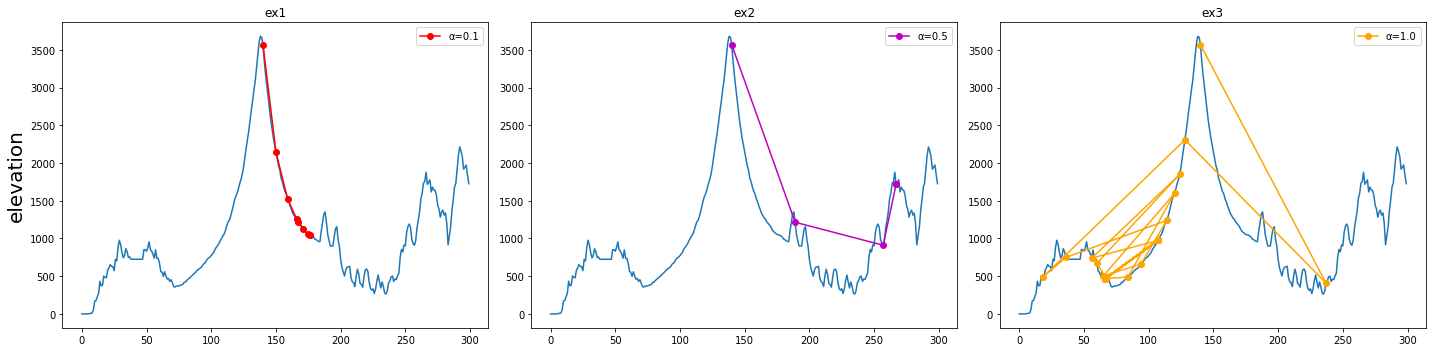

In [88]:

#富士山の断面図
position = fuji[:, 0]
elevation = fuji[:, 3]

#下山過程
first_position = 140
alpha1 = 0.1
alpha2 = 0.5
alpha3 = 1

#ハイパーパラメータ α　を0.1、0.5、1.0で違いを可視化
##ex1
X1 = gradient_decending(first_position, alpha1)
Y1 = [fuji[p, 3] for p in X1]
##ex2
X2 = gradient_decending(first_position, alpha2)
Y2 = [fuji[p, 3] for p in X2]
##ex3
X3 = gradient_decending(first_position, alpha3)
Y3 = [fuji[p, 3] for p in X3]

#グラフを描画
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.plot(position, elevation)
ax1.plot(X1, Y1, marker="o", color="r", label="α={:.1f}".format(alpha1))
ax1.set_title("ex1")
ax1.set_ylabel("elevation", size=20)
ax1.legend()

ax2.plot(position, elevation)
ax2.plot(X2, Y2, marker="o", color="m", label="α={:.1f}".format(alpha2))
ax2.set_title("ex2")
ax2.legend()

ax3.plot(position, elevation)
ax3.plot(X3, Y3, marker="o", color="orange", label="α={:.1f}".format(alpha3))
ax3.set_title("ex3")
ax3.legend()

plt.tight_layout()
plt.show()